In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

print("Scikit-learn libraries imported successfully.")

Scikit-learn libraries imported successfully.


In [6]:
df = pd.read_csv('/content/advertising.csv')


In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


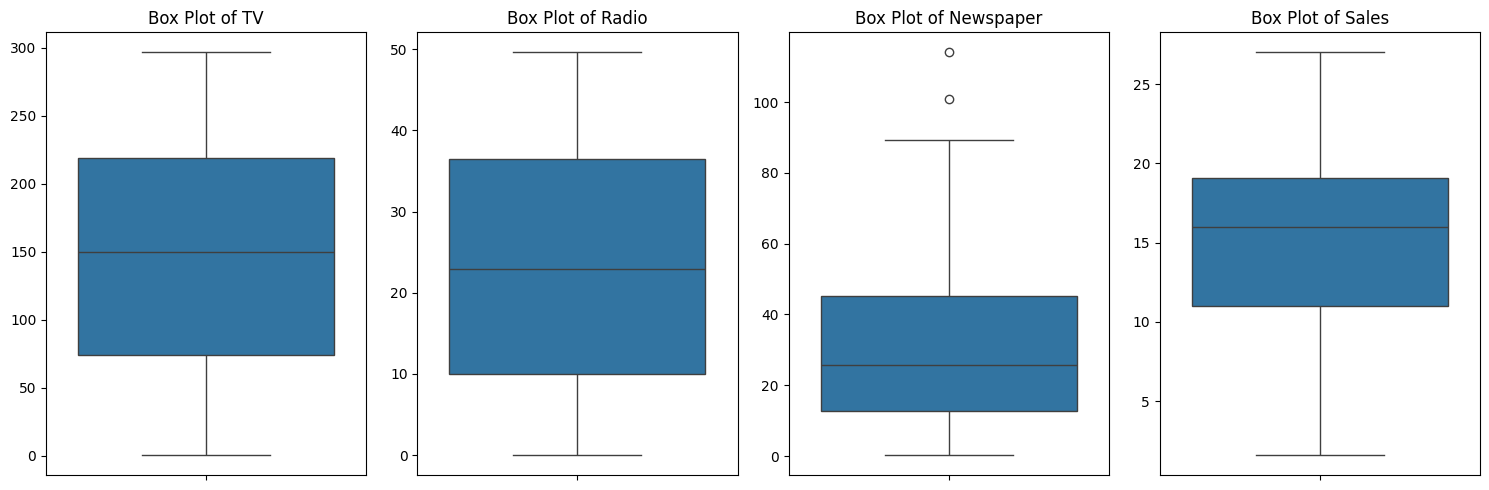

In [12]:
#searched for outliers
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['TV', 'Radio', 'Newspaper', 'Sales']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-label to avoid clutter
plt.tight_layout()
plt.show()


In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Newspaper'
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Cap the outliers in the 'Newspaper' column
df['Newspaper'] = np.where(df['Newspaper'] > upper_bound, upper_bound,
                               np.where(df['Newspaper'] < lower_bound, lower_bound, df['Newspaper']))

print(f"Outliers in 'Newspaper' column capped.")
print(f"Newspaper values above {upper_bound:.2f} were set to {upper_bound:.2f}")
print(f"Newspaper values below {lower_bound:.2f} were set to {lower_bound:.2f}")


Outliers in 'Newspaper' column capped.
Newspaper values above 93.62 were set to 93.62
Newspaper values below -35.78 were set to -35.78


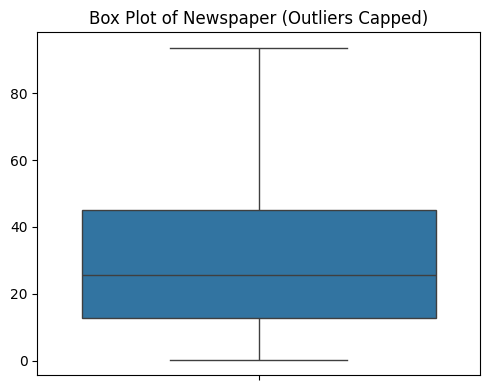

In [16]:
# Regenerate box plot for 'Newspaper' to check the effect of capping
plt.figure(figsize=(5, 4))
sns.boxplot(y=df['Newspaper'])
plt.title('Box Plot of Newspaper (Outliers Capped)')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [20]:
missing_values = df.isnull().sum()
print('Count of missing values per column:')
display(missing_values)

if missing_values.sum() == 0:
    print('\nNo missing values found in the dataset. The data is clean!')
else:
    print('\nMissing values found. Further handling might be required.')

Count of missing values per column:


,0
TV,0
Radio,0
Newspaper,0
Sales,0



No missing values found in the dataset. The data is clean!


no missing values found


In [22]:
# this code checks for duplicate rows

duplicate_rows = df.duplicated().sum()

print(f"Number of duplicate rows found: {duplicate_rows}")

if duplicate_rows == 0:
    print("No duplicate rows found. The dataset is free of duplicates.")
else:
    print("Duplicate rows found. Consider removing them if they are not intentional.")
    # Example of how to drop duplicates (uncomment if needed):
    # df.drop_duplicates(inplace=True)
    # print("Duplicate rows removed.")

Number of duplicate rows found: 0
No duplicate rows found. The dataset is free of duplicates.


columns=200

rows=4


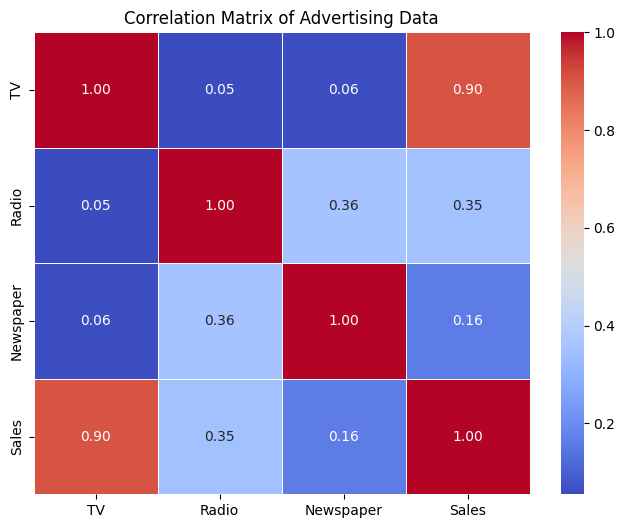

In [29]:
#this is a correlation heatamp graph
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Advertising Data')
plt.show()

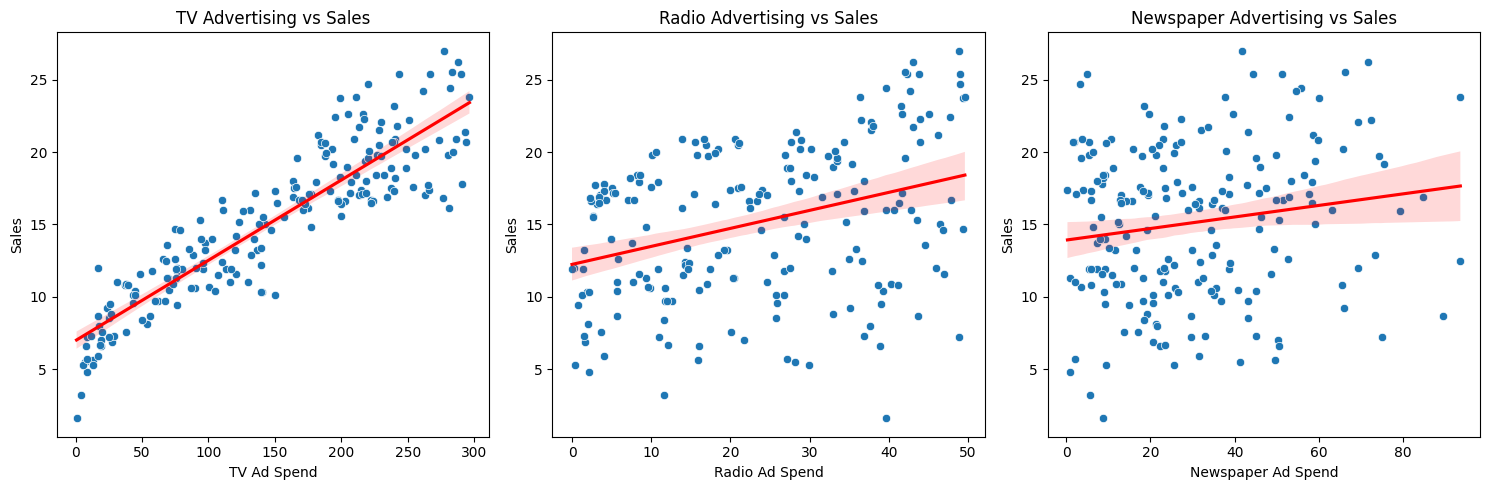

In [30]:
#this is scatter plots bivariant analysis
plt.figure(figsize=(15, 5))

# Scatter plot for TV vs Sales
plt.subplot(1, 3, 1) # 1 row, 3 columns, first plot
sns.scatterplot(x='TV', y='Sales', data=df)
sns.regplot(x='TV', y='Sales', data=df, scatter=False, color='red') # Add a regression line
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Ad Spend')
plt.ylabel('Sales')

# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 2) # 1 row, 3 columns, second plot
sns.scatterplot(x='Radio', y='Sales', data=df)
sns.regplot(x='Radio', y='Sales', data=df, scatter=False, color='red') # Add a regression line
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Ad Spend')
plt.ylabel('Sales')

# Scatter plot for Newspaper vs Sales
plt.subplot(1, 3, 3) # 1 row, 3 columns, third plot
sns.scatterplot(x='Newspaper', y='Sales', data=df)
sns.regplot(x='Newspaper', y='Sales', data=df, scatter=False, color='red') # Add a regression line
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Ad Spend')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

In [27]:
print("Descriptive Statistics of the Dataset:")
display(df.describe())

Descriptive Statistics of the Dataset:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.415750,15.130500
std,85.854236,14.846809,21.316901,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,93.625000,27.000000


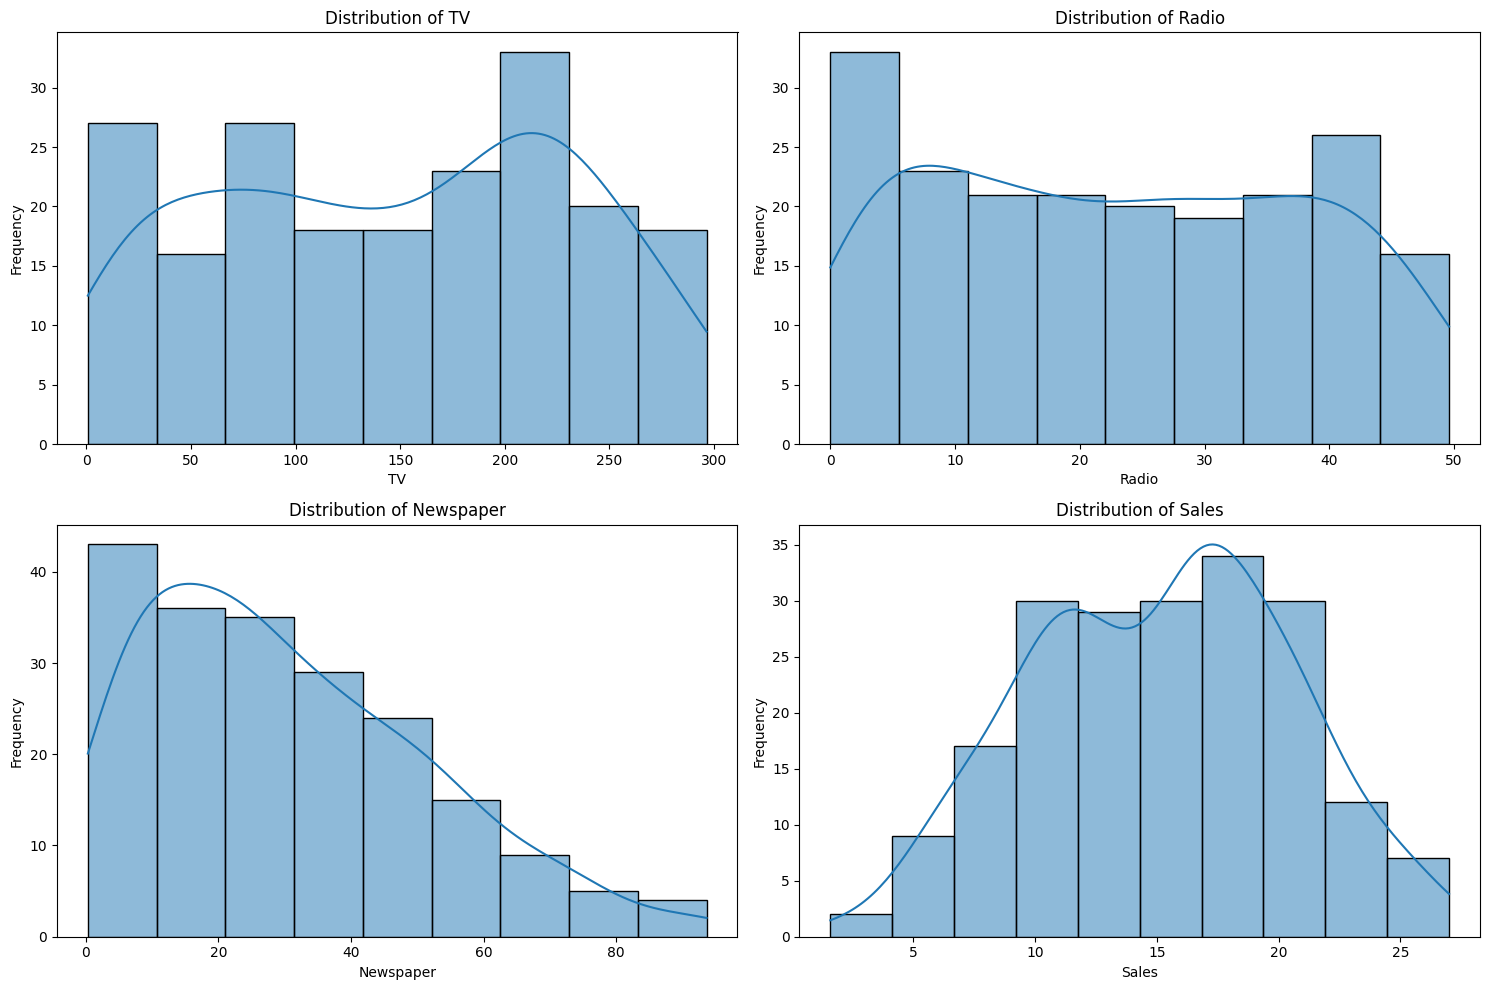

In [28]:
#histograms univariant analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid as needed
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [31]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test features using the *same* scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

Features scaled successfully!
X_train_scaled shape: (160, 3)
X_test_scaled shape: (40, 3)


In [32]:
#building and implementing the model
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [40]:
# Define features (X) as only 'TV' and target (y) as 'Sales' for the entire dataset
X_full_simple = df[['TV']]
y_full_simple = df['Sales']

print(f"Features (X_full_simple) shape: {X_full_simple.shape}")
print(f"Target (y_full_simple) shape: {y_full_simple.shape}")

Features (X_full_simple) shape: (200, 1)
Target (y_full_simple) shape: (200,)


In [41]:
# Initialize the StandardScaler
scaler_full_simple = StandardScaler()

# Fit and transform the entire feature set
X_full_simple_scaled = scaler_full_simple.fit_transform(X_full_simple)

print("Full dataset Simple LR Features scaled successfully!")
print(f"X_full_simple_scaled shape: {X_full_simple_scaled.shape}")

Full dataset Simple LR Features scaled successfully!
X_full_simple_scaled shape: (200, 1)


In [42]:
# Initialize the Linear Regression model for simple LR
model_full_simple = LinearRegression()

# Train the model using the entire scaled dataset
model_full_simple.fit(X_full_simple_scaled, y_full_simple)

print("Simple Linear Regression model trained on entire dataset successfully.")

# Make predictions on the entire scaled dataset
y_pred_full_simple = model_full_simple.predict(X_full_simple_scaled)

print("Predictions made successfully on the entire dataset.")
print("First 5 predictions (Full Simple LR):", y_pred_full_simple[:5])
print("First 5 actual values (Full Simple LR):", y_full_simple[:5].values)

Simple Linear Regression model trained on entire dataset successfully.
Predictions made successfully on the entire dataset.
First 5 predictions (Full Simple LR): [19.73726517  9.44300377  7.92881554 15.37773421 17.00285199]
First 5 actual values (Full Simple LR): [22.1 10.4 12.  16.5 17.9]


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero, replace with NaN or small number if actual is zero
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Model Evaluation Metrics (Multiple Linear Regression):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Model Evaluation Metrics (Multiple Linear Regression):
Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R-squared (R2 Score): 0.91
Mean Absolute Percentage Error (MAPE): 10.87%


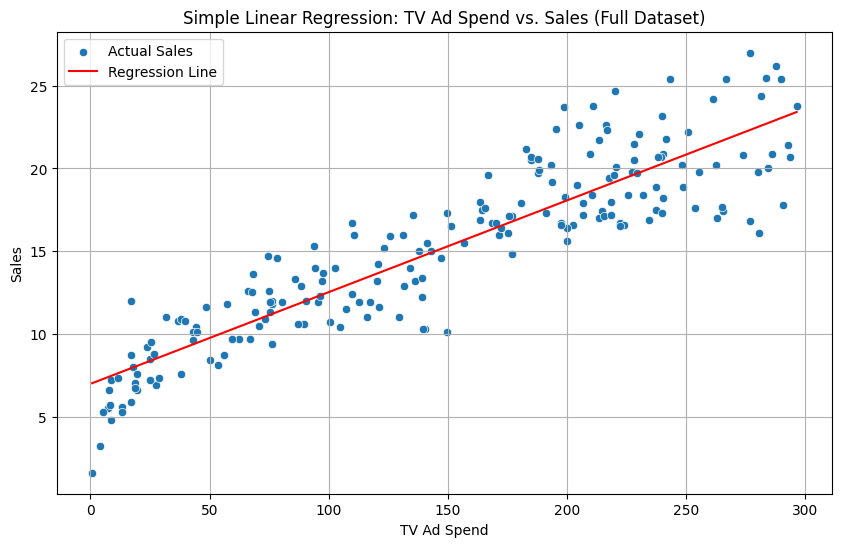

In [44]:
# visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_full_simple['TV'], y=y_full_simple, label='Actual Sales')
sns.lineplot(x=X_full_simple['TV'], y=y_pred_full_simple, color='red', label='Regression Line')
plt.title('Simple Linear Regression: TV Ad Spend vs. Sales (Full Dataset)')
plt.xlabel('TV Ad Spend')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

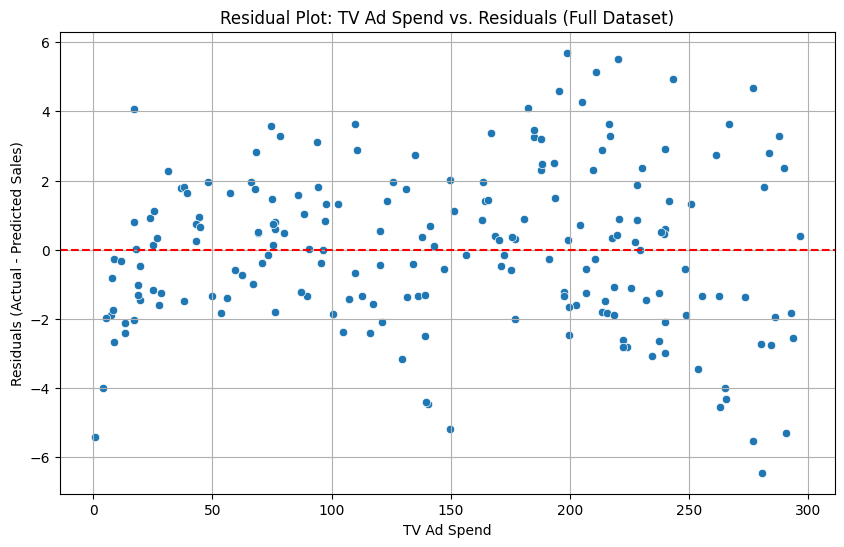

In [45]:
# Calculate residuals
residuals_full_simple = y_full_simple - y_pred_full_simple

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_full_simple['TV'], y=residuals_full_simple)
plt.axhline(y=0, color='red', linestyle='--') # Add a horizontal line at y=0
plt.title('Residual Plot: TV Ad Spend vs. Residuals (Full Dataset)')
plt.xlabel('TV Ad Spend')
plt.ylabel('Residuals (Actual - Predicted Sales)')
plt.grid(True)
plt.show()

***Project overview***

***Data Preparation***

The advertising.csv dataset was loaded, checked for quality, and cleaned.

Outliers in the Newspaper column were handled using the IQR method.

No missing values or duplicates were found.

Features (TV, Radio, Newspaper) and target (Sales) were separated.

The dataset was split into 80% training and 20% testing.


Insight: TV is the most influential advertising medium, followed by Radio. Newspaper contributes very little in a linear relationship.

Predictive Modeling
Multiple Linear Regression

Model trained using TV, Radio, and Newspaper.

Performance:

R² = 0.91

MAE = 1.27

RMSE = 1.71

This model explains 91% of the variation in Sales.

Simple Linear Regression (TV only)


Residual plot showed slight non-linearity but overall a strong fit.

***Conclusion***

The project successfully cleaned and analyzed the advertising dataset, identified how each advertising channel influences sales, and built accurate regression models. The findings clearly show that TV is the most effective advertising medium, and using multiple features greatly improves prediction accuracy.